# Introduction to PageRank

## Background
We live in a XXI century and information is a cornerstone of majority of spheres in our daily life. When we want to find useful information, we just go to our favorite Internet search engine and type a key words. Than, search engine provides us with some kind of relevent information. But how to ensure relevancy of this information?

The naive approach is following: we just measure frequency of key word in each page in the Network. The more appearing frequency of key word we have, the higher position this site will gain. Definetely, this approach has obvious disadvantages, but there was the situation in text search in early 90s.

## PageRank

Here we can see simple example. Imagine, that we have 4 websites with some links. Our goal is to understand some kind of **importance** of each website. Obviously, we can reformulate such problum in terms of directed graphs. Here, each node is website and each directed vertice describes link from one site to another.

![](PR1.svg)

In PageRank model each node should transfer their importance through their outcoming vertices. Suppose, each website has total importance equal to $1$

![](PR2.svg)

Thus, we can introduce transition matrix $A$:

$$
A = \begin{pmatrix}
0 & \frac{1}{2} & 1 & \frac{1}{3} \\
1 & 0 & 0 & \frac{1}{3} \\
0 & 0 & 0 & \frac{1}{3} \\
0 & \frac{1}{2} & 0 & 0
\end{pmatrix}
$$

Let us introduce **PageRank vector** $\mathbf{x}$, which describes importance of each website. 

$$\mathbf{x} = (x_1, x_2, x_3, x_4)^\text{T},\text{ where $x_i$ - importance of $i$-th website}$$

Suppose, initial importance is uniformly distributed between all nodes. Than: 

$$\mathbf{x}^0 = (0.25, 0.25, 0.25, 0.25)^\text{T}$$

Each incoming link increase importance of each node. So, this update can be expressed as a matrix multiplication:

$$\mathbf{x}^1 = A \cdot \mathbf{x}^0 = (0.46, 0.33, 0.08, 0.125)^\text{T}$$

Repeating the same operations we can easily see convergence:

$$\mathbf{x}^2 = A \cdot \mathbf{x}^1 = (0.29, 0.50, 0.04, 0.17)^\text{T}$$

$$\mathbf{x}^3 = A \cdot \mathbf{x}^2 = (0.35, 0.35, 0.06, 0.25)^\text{T}$$

$$\mathbf{x}^4 = A \cdot \mathbf{x}^3 = (0.31, 0.43, 0.08, 0.17)^\text{T}$$

$$\mathbf{x}^5 = A \cdot \mathbf{x}^4 = (0.36, 0.37, 0.06, 0.22)^\text{T}$$

$$\dots$$

$$\mathbf{x}^{14} = A \cdot \mathbf{x}^{13} = (0.33, 0.40, 0.07, 0.20)^\text{T}$$

$$\mathbf{x}^{15} = A \cdot \mathbf{x}^{14} = (0.33, 0.40, 0.07, 0.20)^\text{T}$$

The code below could be used for playing with this simple example.

In [41]:
import numpy as np

# Initializing:
x_0 = np.array([0, 1, 0, 0])

# Input matrix A:
A = np.array([[0, 0.5, 1, 1/3], 
              [1, 0, 0, 1/3], 
              [0, 0, 0, 1/3], 
              [0, 0.5, 0, 0]])

# PageRank iterations:
# k - number of steps to obtain convergence:
k = 300
x_new = x_0
for i in range(k):
    x_old = x_new
    x_new = np.dot(A, x_old)
    print (i+1, x_new)

1 [0.5 0.  0.  0.5]
2 [0.16666667 0.66666667 0.16666667 0.        ]
3 [0.5        0.16666667 0.         0.33333333]
4 [0.19444444 0.61111111 0.11111111 0.08333333]
5 [0.44444444 0.22222222 0.02777778 0.30555556]
6 [0.24074074 0.5462963  0.10185185 0.11111111]
7 [0.41203704 0.27777778 0.03703704 0.27314815]
8 [0.26697531 0.50308642 0.09104938 0.13888889]
9 [0.38888889 0.3132716  0.0462963  0.25154321]
10 [0.28677984 0.47273663 0.08384774 0.1566358 ]
11 [0.37242798 0.33899177 0.05221193 0.23636831]
12 [0.30049726 0.45121742 0.07878944 0.16949588]
13 [0.36089678 0.35699588 0.05649863 0.22560871]
14 [0.31019947 0.43609968 0.0752029  0.17849794]
15 [0.35275206 0.36969879 0.05949931 0.21804984]
16 [0.31703199 0.42543534 0.07268328 0.18484939]
17 [0.34701741 0.37864845 0.06161646 0.21271767]
18 [0.32184658 0.4179233  0.07090589 0.18932423]
19 [0.34297562 0.38495466 0.06310808 0.20896165]
20 [0.32523929 0.4126295  0.06965388 0.19247733]
21 [0.34012774 0.3893984  0.06415911 0.20631475]
22 [0.32

## Mathematical formulation
Consider a directed graph $G$, our problem is to find such $\mathbf{x}^{*}$, that: 

$$A \cdot \mathbf{x}^{*} =\mathbf{x}^{*} \;\;\;\;\;\;\;\;\;\;\; (1)$$

Where $A$ is a matrix, which describes graph: $A_{i,j} \ge 0 , \forall i,j$ and $ \sum\limits_{i = 1}^{n} A_{i,j} = 1$ (A is *column-stochastic* matrix)

It is important to mention, that $A$ is usually *sparse*.

## Linear Algebra

Finding importance of webpages is equivalent to solving system of equations:

$$\begin{pmatrix}
0 & \dfrac{1}{2} & 1 & \dfrac{1}{3} \\
1 & 0 & 0 & \dfrac{1}{3} \\
0 & 0 & 0 & \dfrac{1}{3} \\
0 & \dfrac{1}{2} & 0 & 0
\end{pmatrix} \cdot \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix} = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix}$$

Or, to find eigenvector of matrix $A$, corresponding to unit eigenvalue.

Also, there is a linear system formulation! Firstly, we should find such $\hat{x}$:

$$ \left( A - I\right) \cdot \begin{bmatrix}
\hat{x} \\
1
\end{bmatrix} = 0$$

Then, we could take $\mathbf{x}^{*}$ as a solution:

$$\mathbf{x}^{*} = \dfrac{\begin{bmatrix}
\hat{x} \\
1
\end{bmatrix}}{\left\| \begin{bmatrix}
\hat{x} \\
1
\end{bmatrix}\right\|_1}$$

## Probability

Since the importance of a web page is measured by its popularity (how many incoming links it has), we can view the importance of page $i$ as the probability that a random surfer on the Internet that opens a browser to any page and starts following hyperlinks, visits the page $i$. We can interpret the weights we assigned to the edges of the graph in a probabilistic way: A random surfer that is currently viewing web page $2$, has $\frac{1}{2}$ probability to go to page 1, and $\frac{1}{2}$ probability to go to page 4. We can model the process as a random walk on graphs. Each page has equal probability $\frac{1}{4}$ to be chosen as a starting point. So, the initial probability distribution is given by the column vector $(\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4})^\text{T}$. 

The probability that page $i$ will be visited after one step is equal to $A \cdot \mathbf{x}$, and so on. The probability that page $i$ will be visited after $k$ steps is equal to $A^k \cdot \mathbf{x}$. The sequence $A \cdot \mathbf{x}, A^2 \cdot \mathbf{x}, A^3 \cdot \mathbf{x}, ..., A^k \cdot \mathbf{x}, \dots$ converges in this case to a unique probabilistic vector $\mathbf{x}^*$. In this context $\mathbf{x}^*$ is called the **stationary distribution** and it will be our Page Rank vector. Moreover, the $i$-th entry in the vector $\mathbf{x}^*$ is simply the probability that at each moment a random surfer visits page $i$. The computations are identical to the ones we did in the dynamical systems interpretation, only the meaning we attribute to each step being slightly different.

## Optimization
We can solve problem (1) as an optimization problem: finding closest solution, which satisfy some criteria:

$$\mathbf{x}^{*} = \underset{\mathbf{x} \in S^n}{\operatorname{argmin}} \lVert A\mathbf{x} - \mathbf{x} \rVert_2 = \underset{\mathbf{x} \in S^n}{\operatorname{argmin}} \lVert A\mathbf{x} - \mathbf{x} \rVert_2^2$$

Where $S^n$ - is a unit simplex ($S^n = \{x: \sum\limits_{i = 1}^n x_i = 1, x_i \ge 0 \}$)

# Problems and How We Address Them

## Dangling Nodes
Dangling nodes are nodes (webpages) with no outgoing links. These nodes cause issues in the convergence of the PageRank algorithm as they do not distribute their importance to any other nodes. To address this, we modify the transition matrix to ensure that the importance from dangling nodes is distributed uniformly across all nodes. This can be achieved by adding a small probability that a random surfer will jump to any node, effectively ensuring that the transition matrix remains column-stochastic.

## Disconnected Components
Disconnected components in the graph mean some nodes might not be reachable from others, leading to inaccuracies in the importance scores. To address this, we introduce a damping factor, typically set to 0.85, which ensures that there is always a small probability that a random surfer can jump to any node, regardless of the structure of the graph. This ensures the graph is strongly connected and helps in achieving convergence.

$$
x_{k+1} = \left(p A + (1-p) \frac{1}{n} I\right)x_k
$$


##### Perron-Frobenius Theorem

If $A$ is a positive, column stochastic matrix, then:

1) $1$ is an eigenvalue of multiplicity one.

2) $1$ is the largest eigenvalue: all the other eigenvalues have absolute value smaller than $1$.

3) The eigenvectors corresponding to the eigenvalue $1$ have either only positive entries or only negative entries. In particular, for the eigenvalue $1$ there exists a unique eigenvector with the sum of its entries equal to $1$.

# Implementation

#### Loading matrix A

In [42]:
# https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_matrix.mat
# https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_dict.pickle

import requests
import pickle
# Define the URLs of the files to download
url1 = "https://raw.githubusercontent.com/MerkulovDaniil/mda24/main/files/simple_wiki_matrix.mat"
url2 = "https://raw.githubusercontent.com/MerkulovDaniil/mda24/main/files/simple_wiki_dict.pickle"
# Download the files
response1 = requests.get(url1)
response2 = requests.get(url2)
# Save the files to local files
with open("simple_wiki_matrix.mat", "wb") as f:
    f.write(response1.content)
with open("simple_wiki_dict.pickle", "wb") as f:
    f.write(response2.content)
print("Files downloaded successfully!")

Files downloaded successfully!


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import normalize
from scipy.sparse import csc_matrix

# Loading web-graph matrix
matrix = scipy.io.loadmat('simple_wiki_matrix.mat')
A_raw = matrix['W']

# Getting data to input format of PageRank model (Normalization)
A_normalized = normalize(A_raw, norm='l1', axis=0)
N = A_normalized.shape[0]

# Check that our matrix is column-stochastic
def column_stochastic_check(matrix):
    eps = 0.0001  # Accuracy of normalization
    # Check for negative entries
    if (matrix.data < 0).any():
        return False
    # Check if columns sum to 1 within tolerance
    col_sums = matrix.sum(axis=0).A1  # Convert matrix sum to a flat array
    return np.all(np.abs(col_sums - 1) < eps)

print('Size of the PageRank matrix:', N)
print('Checking if our matrix is column-stochastic...')
print('Is column-stochastic:', column_stochastic_check(A_normalized))

# Memory usage information
sparse_format_bytes = A_normalized.data.nbytes + A_normalized.indices.nbytes + A_normalized.indptr.nbytes
usual_format_bytes = N * N * 4  # Assuming 32-bit (4-byte) floats for usual dense matrix
compression_rate = usual_format_bytes / sparse_format_bytes

print('Required memory: Sparse format ({:.2f} MB), Usual format ({:.2f} MB). Compression rate: {:.2f}'.format(
    sparse_format_bytes / 1024 / 1024,
    usual_format_bytes / 1024 / 1024,
    compression_rate
))

Size of the PageRank matrix: 162130
Checking if our matrix is column-stochastic...
Is column-stochastic: True
Required memory: Sparse format (79.26 MB), Usual format (100273.65 MB). Compression rate: 1265.06


## Power Method

### Problem Description

The problem involves implementing the power method to find the dominant eigenvalue and corresponding eigenvector of a matrix $A$. This method is particularly useful for large matrices where other methods may be computationally expensive.

### Mathematical Formulation of the Algorithm

The power method is an iterative algorithm used to approximate the dominant eigenvalue (the eigenvalue with the greatest absolute value) and its corresponding eigenvector of a given matrix $A$. The method is defined as follows:

1. **Initialization**:
    - Start with an initial vector $x_0$.
    - Choose the damping factor $p$ and the number of iterations $k$.

2. **Iteration**:
    - For each iteration $k$ from 1 to $T$:
        1. Compute $y_{k} = \left( p A  + (1 - p)\frac{1}{N} I \right)x_{k-1}$, where $N$ is the size of the matrix $A$.
        2. Normalize the resulting vector: $x_{k} = \frac{y_{k}}{\|y_{k}\|}$.
        3. Estimate the eigenvalue: $\lambda_k = x_{k}^T A x_{k}$.
        4. Calculate the error as $\|Ax_{k} - \lambda_k x_{k}\|$.

3. **Output**:
    - After $k$ iterations, the algorithm returns the approximate dominant eigenvalue $\lambda_k$, the corresponding eigenvector $x_k$, and the errors for each iteration.

Note, that the original matrix `A_normalized` stored in sparse format. Also note, that your code will not run if you will form identity matrix $I$ explicitly.

In [110]:
# Note, that the matrix is stored in sparse format
type(A_normalized)

scipy.sparse._csc.csc_matrix

In [98]:
import numpy as np
import matplotlib.pyplot as plt

### YOUR CODE HERE ###
def power_method(A, p, x0, k):
    N = len(x0)   
    x_prev = np.array(x0)
    errors = []
    
    for i in range(k):
        ### YOUR CODE HERE ###
        
        errors.append()
    
    return lambda_k, x_k, errors

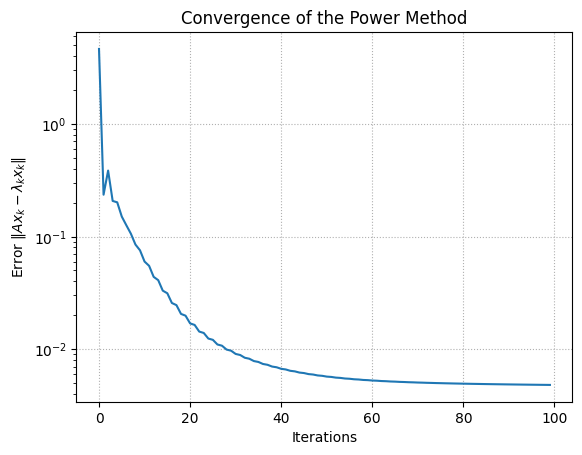

In [115]:
p = 0.85
k = 100
x_0 = np.ones(N)/np.sqrt(N)

lambda_k, x_final, errors = power_method(A_normalized, p, x_0, k)

# Plotting the convergence
plt.plot(errors)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r'Error $\|Ax_k - \lambda_k x_k\|$')
plt.title('Convergence of the Power Method')
plt.grid(linestyle=":")
plt.show()

In [113]:
# Finding correspondence between number of article in matrix A and actual name of article.
import pickle

articles_ = []
with open('simple_wiki_dict.pickle', 'rb') as f:
    while True:
        try:
            temp = pickle._Unpickler(f)       #
            temp.encoding = 'latin1'          # Some encoding magic suitable for Python 3
            articles_.append(temp.load())     #
        except EOFError:
            break

articles = articles_[0]

In [114]:
# Top most important articles in English Wikipedia:
n_top = 36
top = x_final.argsort()[-n_top:][::-1]

print ("Top " + str(n_top) + " articles in English segment of Wikipedia:\n")
for index in top:
    print (articles[index])

Top 36 articles in English segment of Wikipedia:

United_States
Multimedia
Geographic_coordinate_system
France
Americans
Internet_Movie_Database
Japan
Association_football
England
United_Kingdom
Germany
International_Standard_Book_Number
English_language
Time_zone
City
Wikimedia_Commons
Music_genre
Canada
Australia
Record_label
Daylight_saving_time
Italy
Departments_of_France
Sweden
Biological_classification
Spain
London
Communes_of_France
Movie
Europe
List_of_years
Animal
India
California
Regions_of_France
Russia


In [109]:
# Here you can just write name of the article and show the position in our PageRank rating. For example, article "Mathematics" took 728-th place :()
word = 'Optimization'

top = x_final.argsort()[-N:][::-1]
for i in range(N):
    if articles[top[i]] == word:
        print (i)

84759
